In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from datetime import datetime
import time
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

import numpy as np
import pandas as pd


In [2]:
def create_sequences_no_culling(df, past_hours=5):
    X, y = [], []
    
    for i in range(past_hours, len(df) - 1):
        past_data = df.iloc[i-past_hours : (i+1)].values[::-1]
     
        

        target_value = df.iloc[(i + 1)]["temp change"]  # Target variable
        
        X.append(past_data)
        y.append(target_value)
    
    return np.array(X), np.array(y)



def create_sequences(df, past_hours=5):
    X, y = [], []
    
    for i in range(past_hours, len(df) - 1):
        past_data = df.iloc[i-past_hours : (i+1)].values[::-1]
        
        # change the dat to hour
        date = pd.to_datetime(past_data[0][0])
        hour = date.hour
        past_data[0][0] = hour
        
        
        past_data = past_data.flatten()
        
        # remove the other date and times

        for j in range(1, past_hours+1):
            idx = j * 12 - (j - 1)
            past_data = np.delete(past_data, idx)
        

        target_value = df.iloc[(i + 1)]["temp change"]  # Target variable
        
        X.append(past_data)
        y.append(target_value)
    
    return np.array(X), np.array(y)


weather_data = pd.read_csv('../weather.csv')


In [3]:
X_full, y_full = create_sequences_no_culling(weather_data, 5)

In [4]:
# create data based on 5 past hours
X, y = create_sequences(weather_data, 5)

In [5]:
# for the first X and y

print(X_full[0])
print(y_full[0])

print(X[0])
print(y[0])

print(X[1])
print(y[1])

[['2013-07-09 13:00' 21.0 13.3 61 12 20 48.3 101.63 0 0 1 0.0]
 ['2013-07-09 12:00' 21.0 13.6 62 12 13 48.3 101.67 0 0 55 0.8]
 ['2013-07-09 11:00' 20.2 13.7 66 13 14 48.3 101.71 0 0 55 2.8]
 ['2013-07-09 08:00' 17.4 13.2 76 12 7 48.3 101.77 0 0 55 1.2]
 ['2013-07-09 07:00' 16.2 13.0 81 11 5 32.2 101.75 0 0 1 1.0]
 ['2013-07-09 06:00' 15.2 13.4 89 0 0 32.2 101.74 0 0 55 0.0]]
1.5
[13 21.0 13.3 61 12 20 48.3 101.63 0 0 1 0.0 21.0 13.6 62 12 13 48.3
 101.67 0 0 55 0.8 20.2 13.7 66 13 14 48.3 101.71 0 0 55 2.8 17.4 13.2 76
 12 7 48.3 101.77 0 0 55 1.2 16.2 13.0 81 11 5 32.2 101.75 0 0 1 1.0 15.2
 13.4 89 0 0 32.2 101.74 0 0 55 0.0]
1.5
[14 22.5 13.2 55 13 19 48.3 101.56 25 0 55 1.5 21.0 13.3 61 12 20 48.3
 101.63 0 0 1 0.0 21.0 13.6 62 12 13 48.3 101.67 0 0 55 0.8 20.2 13.7 66
 13 14 48.3 101.71 0 0 55 2.8 17.4 13.2 76 12 7 48.3 101.77 0 0 55 1.2
 16.2 13.0 81 11 5 32.2 101.75 0 0 1 1.0]
-0.4


## Training a random forest based on our data


In [6]:

def train_and_test_model(X, y, n_estimators=20):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Step 5: Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Mean Absolute Error: {mae:.4f}")

    # Show a few predicted values vs actual values
    return mae
    



In [7]:
accuracy_scores = []
n_enumerations = []

for i in range(1, 6):
    accuracy_scores.append(train_and_test_model(X, y, i*20))
    n_enumerations.append(i*20)


Mean Absolute Error: 0.5917
Mean Absolute Error: 0.5822
Mean Absolute Error: 0.5794
Mean Absolute Error: 0.5776
Mean Absolute Error: 0.5772


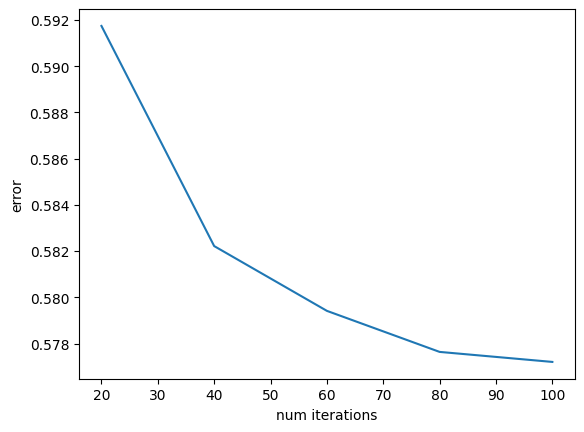

In [9]:
plt.plot(n_enumerations, accuracy_scores, linestyle="-", label="test")
plt.xlabel("num iterations")
plt.ylabel("error")
plt.show()
plt.close()
    